# **Week 0 Main Assignment**

### Read Lisan_Al_Gaib.pdf for problem description and complete the following functions

In [1]:
import time # to time the execution
import numpy as np
import matplotlib.pyplot as plt

In [2]:
### TODO 1
### Load data from data_path
### Check the input file spice_locations.txt to understand the Data Format
### Return : np array of size Nx2
def load_data(data_path):
    return np.loadtxt(data_path, delimiter = ',')

In [3]:
### TODO 2.1
### If init_centers is None, initialize the centers by selecting K data points at random without replacement
### Else, use the centers provided in init_centers
### Return : np array of size Kx2
def initialise_centers(data, K, init_centers=None):
    N = data.shape[0]
    if(init_centers == None):
        points = np.random.choice(N, size= K, replace= False)
        init_centers = data[points]
    return init_centers

In [4]:
### TODO 2.2
### Initialize the labels to all ones to size (N,) where N is the number of data points
### Return : np array of size N
def initialise_labels(data):
    N = data.shape[0]
    return np.ones(N)

In [5]:
### TODO 3.1 : E step
### For Each data point, find the distance to each center
### Return : np array of size NxK
def calculate_distances(data, centers):
    N = data.shape[0]
    K = centers.shape[0]
    data_X = data.T[0]
    data_Y = data.T[1]
    centers_X = centers.T[0]
    centers_Y = centers.T[1]
    dist_X = data_X.reshape(N, 1) - centers_X.reshape(1, K)
    dist_Y = data_Y.reshape(N, 1) - centers_Y.reshape(1, K)
    dist = (dist_X**2 + dist_Y**2)**0.5
    return dist

In [6]:
### TODO 3.2 : E step
### For Each data point, assign the label of the nearest center
### Return : np array of size N
def update_labels(distances):
    return np.argmin(distances, axis= 1)

In [7]:
### TODO 4 : M step
### Update the centers to the mean of the data points assigned to it
### Return : np array of size Kx2
def update_centers(data, labels, K):
    new_centers = []
    for i in range(K):
        center = np.mean(data[np.argwhere(labels == i)], axis= 0)
        new_centers.append(center[0])
    return np.array(new_centers)


In [8]:
### TODO 6 : Check convergence
### Check if the labels have changed from the previous iteration
### Return : True / False
def check_termination(labels1, labels2):
    s = np.sum(labels1 == labels2)
    N = np.size(labels1)
    if N == s:
        return True
    else:
        return False

In [9]:
### DON'T CHANGE ANYTHING IN THE FOLLOWING FUNCTION
def kmeans(data_path:str, K:int, init_centers):
    '''
    Input :
        data (type str): path to the file containing the data
        K (type int): number of clusters
        init_centers (type numpy.ndarray): initial centers. shape = (K, 2) or None
    Output :
        centers (type numpy.ndarray): final centers. shape = (K, 2)
        labels (type numpy.ndarray): label of each data point. shape = (N,)
        time (type float): time taken by the algorithm to converge in seconds
    N is the number of data points each of shape (2,)
    '''
    data = load_data(data_path)    
    centers = initialise_centers(data, K, init_centers)
    labels = initialise_labels(data)

    start_time = time.time() # Time stamp 

    while True:
        distances = calculate_distances(data, centers)
        labels_new = update_labels(distances)
        centers = update_centers(data, labels_new, K)
        if check_termination(labels, labels_new): break
        else: labels = labels_new
 
    end_time = time.time() # Time stamp after the algorithm ends
    return centers, labels, end_time - start_time 

In [10]:
### TODO 7
def visualise(data_path, labels, centers):
    
    data = load_data(data_path)
    # Scatter plot of the data points
    plt.scatter(data[:, 0], data[:, 1], c = labels, s = 20)
    plt.scatter(centers[:, 0], centers[:, 1],c = 'black', s = 100, alpha = 0.5)
    ### Set title as 'K-means clustering'
    plt.title("K-means clustering")
    ### Set xlabel as 'Longitude'
    plt.xlabel('Longitude')
    ### Set ylabel as 'Latitude'
    plt.ylabel('Latitude')
    ### Save the plot as 'kmeans.png'
    plt.savefig('kmeans.png')

    ## DO NOT CHANGE THE FOLLOWING LINE
    return plt

[[-1.93560779 -0.38938452]
 [ 4.51518371  5.35201025]]
Time taken for the algorithm to converge: 0.0021026134490966797


<module 'matplotlib.pyplot' from 'c:\\Users\\Tejeswar K\\AppData\\Local\\Programs\\Python\\Python312\\Lib\\site-packages\\matplotlib\\pyplot.py'>

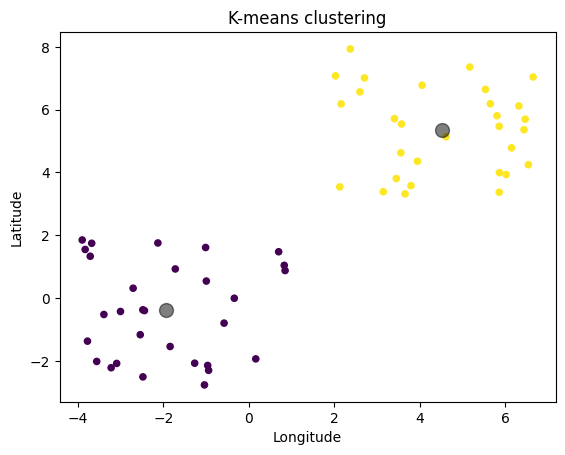

In [11]:
### After you have completed the above functions, run the following code to generate the plot
data_path = 'spice_locations.txt'
K, init_centers = 2, None
centers, labels, time_taken = kmeans(data_path, K, init_centers)
print(centers)
print('Time taken for the algorithm to converge:', time_taken)
visualise(data_path, labels, centers)